In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

# Flattening

In [3]:
files= np.loadtxt('c2data.txt', dtype='str')
darks = np.loadtxt('darksc2.txt', dtype='str')
allimagedata = [fits.getdata(f) for f in files]
darksimages = [fits.getdata(f) for f in darks]
darksmedia = np.median(darksimages, axis=0)
flatteddatac2 = allimagedata - darksmedia

We plot an example one

<matplotlib.colorbar.Colorbar instance at 0x7f9ac65d1cb0>

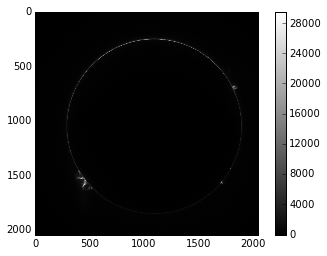

In [7]:
plt.imshow(flatteddatac2[60],cmap='gray')
plt.colorbar()

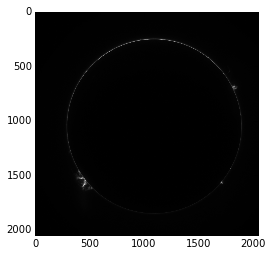

In [8]:
plt.imshow(allimagedata[60],cmap='gray')

In [9]:
for i in range(80):
    fits.writeto(files[i]+'processed'+'.fts',flatteddatac2[i],header=fits.open(files[i])[0].header)

<matplotlib.colorbar.Colorbar instance at 0x7f9ac63b4878>

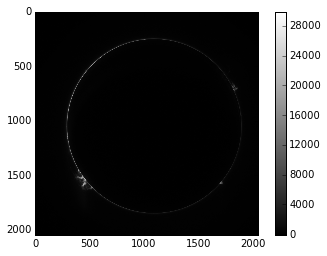

In [12]:
onefit=fits.getdata('imoa_10830_c2_20160126_12211900_b1.ftsprocessed.fts')
headerone=fits.open('imoa_10830_c2_20160126_12211900_b1.ftsprocessed.fts')[0].header
plt.imshow(onefit,cmap='gray')
plt.colorbar()


# Brillance

We create the median of all the flatted data.

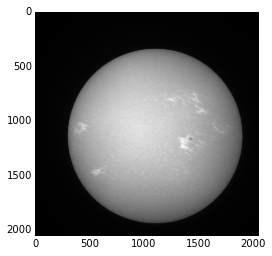

In [15]:
medianflattedc1 = np.median(flatteddatac1, axis=0)
plt.imshow(medianflattedc1,cmap='gray')

We can now mask to get only the disk of the Sun. For l1 we decide a threshold of 900 *adu*. We create the mask and put to zero all below 900. The mask looks like

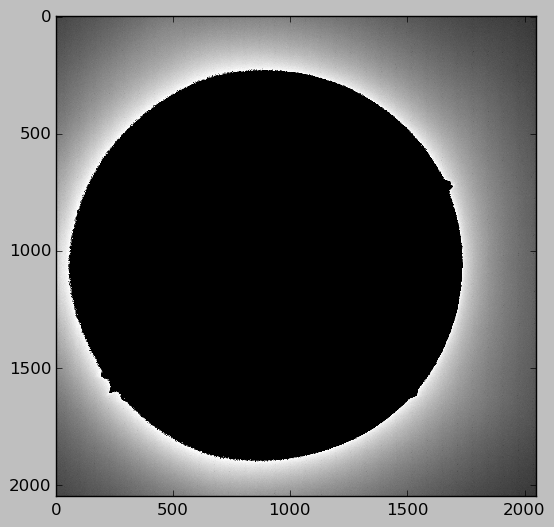

In [36]:
maskc1 = medianflattedc1 < 800 
maskedc1=(np.where(maskc1,1,0))*medianflattedc1
plt.imshow(maskedc1, cmap='gray')

In [ ]:
The resulting masked image looks like:

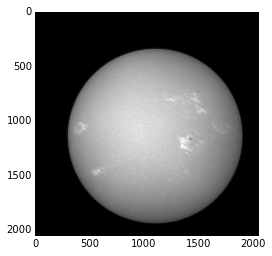

In [16]:
maskc1 = medianflattedc1 < 900 
maskedc1=(np.where(maskc1,0,1))*medianflattedc1
plt.imshow(maskedc1, cmap='gray')


Now we calculate the total of the masked image to get the luminosity of the Sun:
    

In [17]:
totalc1 = np.sum(maskedc1)
print(totalc1)

26969465948.0


# Brillance Callibration

Now that we have 